# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [5]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# n_samples is the number of training examples
n_samples = train_X.shape[0]

Use Tensorflow to define placeholders X and Y, variables W and b.

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model parameters: weight and bias
# rng.randn() returns a sample from standard normal distribution
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model: pred = X*W + b
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.648769915 W= 0.67211 b= -2.23809
Epoch: 0100 cost= 0.582743883 W= 0.646981 b= -2.05731
Epoch: 0150 cost= 0.524340332 W= 0.623346 b= -1.88728
Epoch: 0200 cost= 0.472679585 W= 0.601117 b= -1.72737
Epoch: 0250 cost= 0.426982403 W= 0.58021 b= -1.57697
Epoch: 0300 cost= 0.386561841 W= 0.560547 b= -1.43551
Epoch: 0350 cost= 0.350807548 W= 0.542053 b= -1.30247
Epoch: 0400 cost= 0.319181114 W= 0.524659 b= -1.17734
Epoch: 0450 cost= 0.291207045 W= 0.5083 b= -1.05965
Epoch: 0500 cost= 0.266462266 W= 0.492913 b= -0.948959
Epoch: 0550 cost= 0.244574666 W= 0.478442 b= -0.844854
Epoch: 0600 cost= 0.225214317 W= 0.464831 b= -0.746939
Epoch: 0650 cost= 0.208089769 W= 0.45203 b= -0.654849
Epoch: 0700 cost= 0.192942441 W= 0.439991 b= -0.568235
Epoch: 0750 cost= 0.179544404 W= 0.428667 b= -0.486773
Epoch: 0800 cost= 0.167693511 W= 0.418016 b= -0.410156
Epoch: 0850 cost= 0.157211244 W= 0.408 b= -0.338095
Epoch: 0900 cost= 0.147939548 W= 0.398578 b= -0.270319
Epoch: 0950 cost= 0.1397387

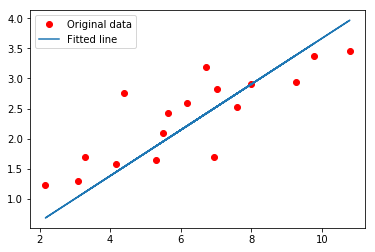

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()